Missing Values:
 id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
delayed                0
dtype: int64

Delay Value Counts:
 delayed
0    6563
1    4436
Name: count, dtype: int64

Summary Stats:
                 id  customer_care_calls  customer_rating  cost_of_the_product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     82

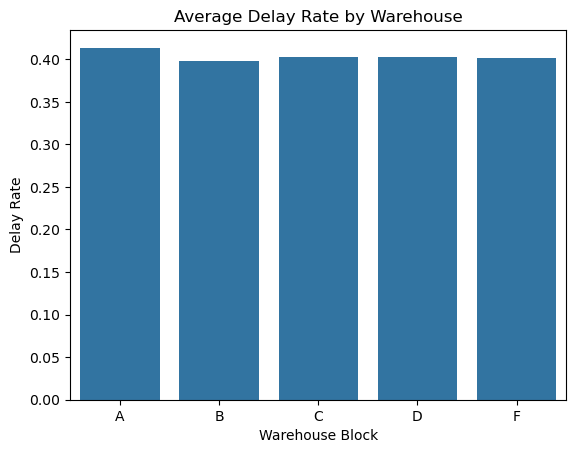

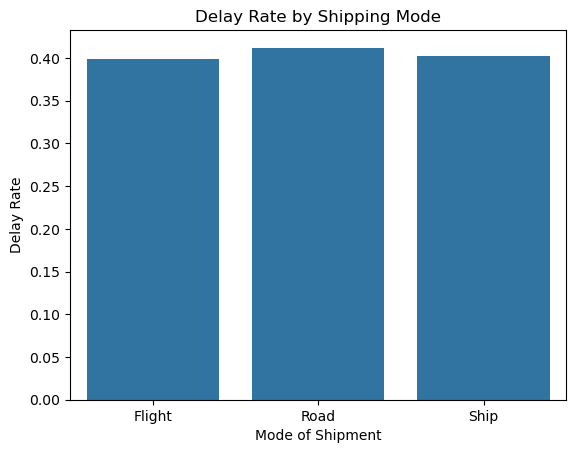

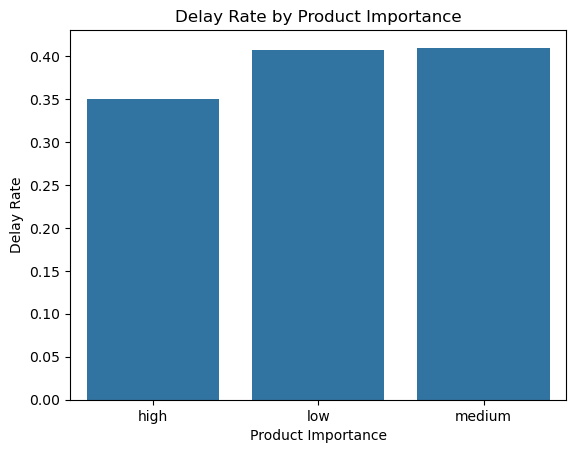

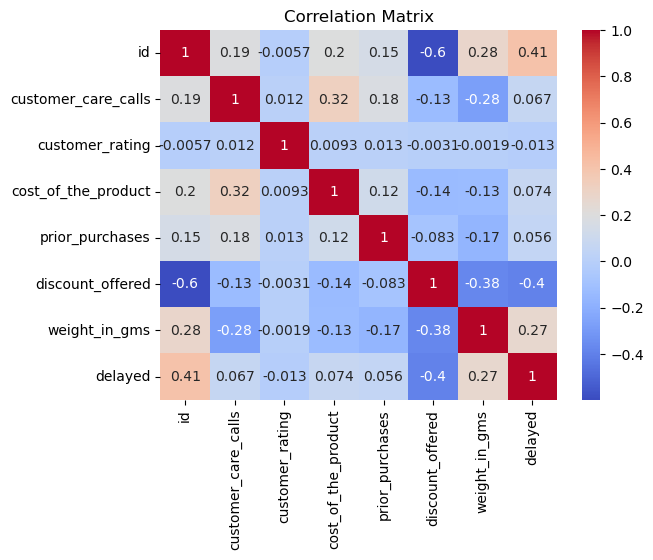

In [3]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
df = pd.read_csv("train.csv")

# Step 3: Clean Column Names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Step 4: Rename and Recode Target Column
df.rename(columns={"reached.on.time_y.n": "delayed"}, inplace=True)
df["delayed"] = df["delayed"].apply(lambda x: 1 if x == 0 else 0)

# Step 5: Quick Checks
print("Missing Values:\n", df.isnull().sum())
print("\nDelay Value Counts:\n", df["delayed"].value_counts())
print("\nSummary Stats:\n", df.describe())

# Step 6: Delay Rate by Warehouse Block
warehouse_delays = df.groupby("warehouse_block")["delayed"].mean().reset_index()
sns.barplot(data=warehouse_delays, x="warehouse_block", y="delayed")
plt.title("Average Delay Rate by Warehouse")
plt.ylabel("Delay Rate")
plt.xlabel("Warehouse Block")
plt.show()

# Step 7: Delay Rate by Mode of Shipment
shipment_mode = df.groupby("mode_of_shipment")["delayed"].mean().reset_index()
sns.barplot(data=shipment_mode, x="mode_of_shipment", y="delayed")
plt.title("Delay Rate by Shipping Mode")
plt.ylabel("Delay Rate")
plt.xlabel("Mode of Shipment")
plt.show()

# Step 8: Delay Rate by Product Importance
importance_delay = df.groupby("product_importance")["delayed"].mean().reset_index()
sns.barplot(data=importance_delay, x="product_importance", y="delayed")
plt.title("Delay Rate by Product Importance")
plt.ylabel("Delay Rate")
plt.xlabel("Product Importance")
plt.show()

# Step 9: Optional — Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
